In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=[10, 15, 25], n_features=2, centers=[[-1, -1], [0, 1], [1, 0]])

X, y

(array([[-0.53677168,  0.47703157],
        [-0.34170961, -0.4060803 ],
        [ 0.19677564,  3.02758677],
        [ 1.38763728,  1.36040256],
        [-2.43019232, -0.11814488],
        [ 1.26850396,  0.44533155],
        [-0.848025  , -2.32432765],
        [ 0.52855911, -0.17101125],
        [-0.04418853,  0.78384128],
        [ 0.32268632, -0.25022955],
        [ 1.75248577, -0.9391243 ],
        [ 1.59242215,  0.4581048 ],
        [-1.29865813,  0.5215419 ],
        [ 1.62406963, -0.20248438],
        [-2.01167318, -0.82651714],
        [-0.69456109,  0.22217186],
        [ 0.29705097, -0.55306853],
        [ 2.67016503, -0.35276711],
        [ 2.90320443,  0.73193965],
        [ 1.25270522,  2.29092518],
        [-0.86428157, -0.3662174 ],
        [ 1.72187977, -0.40502873],
        [ 0.65612698, -0.09308398],
        [ 0.82429097,  1.0872759 ],
        [ 1.23697976,  0.25225044],
        [ 1.37047943, -1.28455907],
        [ 1.77084974,  0.93204078],
        [ 2.72913275, -1.142

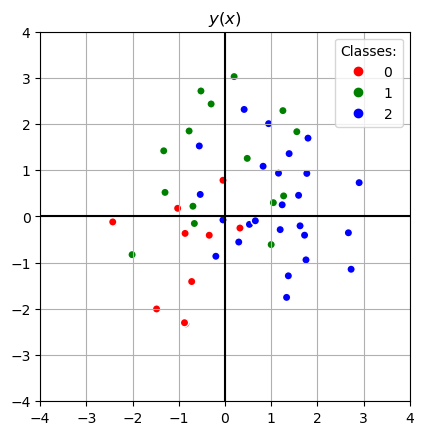

In [6]:
from matplotlib.colors import ListedColormap
rgb_map = ListedColormap(('r','g','b'))

plt.grid(True)
plt.axhline(0,0,c='k')
plt.axvline(0,0,c='k')
#plt.legend(*plt.scatter(X[:,0],X[:,1],c=y,cmap=rgb_map,
plt.legend(*plt.scatter(X[:, 0], X[:, 1], c=y, cmap=rgb_map, edgecolors='w').legend_elements(), title='Classes:')
plt.title('$y(x)$')
plt.axis('square'); plt.axis((-4.0, 4.0, -4.0, 4.0))
plt.show()

In [7]:
class KNN():
    def __init__(self, k=1):
        self.k = k
        self.classes = None
        self.X_train = None
        self.y_train = None

    def __repr__(self):
        return f'KNearestNeighbors(n_neighbors={self.k})'

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.X_train = X
        self.y_train = y
        return self

    def predict_proba(self, X):
        probas = []
        for instance in X:
            # Calculate all points' distance to every point in X_train
            distances2 = []
            for point in self.X_train:
                distance = np.sum((instance - point)**2)  # Euclidean distance squared
                distances2.append(distance)

            # Check if there are enough points for the k-nearest neighbors
            if len(distances2) < self.k:
                raise ValueError(f"Not enough training samples for k={self.k}")

            # Sort the distances and determine the distance of the k'th smallest one
            threshold = sorted(distances2)[self.k - 1]

            # Calculate the distribution of class labels among neighbors with distance <= threshold
            neighbor_labels = self.y_train[np.array(distances2) <= threshold]
            
            # One-hot encoding of neighbors' labels
            y_onehot = (np.array([neighbor_labels]).T == self.classes)
            
            # Calculate the probabilities for each class
            probabilities = np.mean(y_onehot, axis=0)
            probas.append(probabilities)

        return np.array(probas)

    def predict(self, X):
        return self.classes[np.argmax(self.predict_proba(X), axis=1)]


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# my KNN model
knn = KNN(k=3)
knn.fit(X_train, y_train)


# Create sklearn KNN model
sk_model = KNeighborsClassifier(n_neighbors=3)
sk_model.fit(X_train, y_train)

# Predict using your implementation
y_pred_your = knn.predict(X_test)

# Compare with sklearn's prediction
y_pred_sklearn = sk_model.predict(X_test)

print(f"Your predictions: {y_pred_your}")
print(f"Sklearn predictions: {y_pred_sklearn}")
print(f"Accuracy of sklearn: {accuracy_score(y_pred_sklearn, y_test)}")

print(f"Accuracy of mine: {accuracy_score(y_pred_your, y_test)}")


Your predictions: [2 2 2 1 2 1 2 2 2 2]
Sklearn predictions: [2 2 2 1 2 1 2 2 2 2]
Accuracy of sklearn: 0.7
Accuracy of mine: 0.7


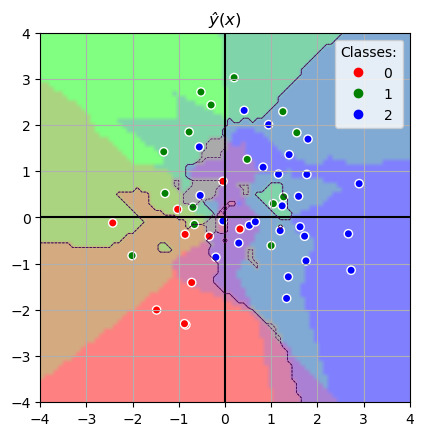

In [9]:
xx1, xx2 = np.meshgrid(np.linspace(-4.0, 4.0, 81), np.linspace(-4.0, 4.0, 81))
XX = np.array([xx1.ravel(), xx2.ravel()]).T
yy = knn.predict_proba(XX).reshape(xx1.shape + (3, ))

plt.grid(True); plt.axhline(0.0, c='k'); plt.axvline(0.0, c='k')
plt.imshow(yy, extent=(-4.0, 4.0, -4.0, 4.0), origin='lower', interpolation='bilinear', alpha=0.5)
for z in range(yy.shape[2]):
    plt.contour(xx1, xx2, yy[:, :, z] / (1.0 - yy.min(axis=2)), [0.5], linewidths=0.5, linestyles='dashed')
plt.legend(*plt.scatter(X[:, 0], X[:, 1], c=y, cmap=rgb_map, edgecolors='w').legend_elements(), title='Classes:')
plt.title('$ŷ(x)$')
plt.axis('square'); plt.axis((-4.0, 4.0, -4.0, 4.0))
plt.show()

## make it pipeline


In [ ]:

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

class KNN():
    def __init__(self, k=1):
        self.k = k
        self.classes = None
        self.X_train = None
        self.y_train = None

    def __repr__(self):
        return f'KNearestNeighbors(n_neighbors={self.k})'

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.X_train = X
        self.y_train = y
        return self

    def predict_proba(self, X):
        probas = []
        for instance in X:
            # Calculate all points' distance to every point in X_train
            distances2 = []
            for point in self.X_train:
                distance = np.sum((instance - point)**2)  # Euclidean distance squared
                distances2.append(distance)

            # Check if there are enough points for the k-nearest neighbors
            if len(distances2) < self.k:
                raise ValueError(f"Not enough training samples for k={self.k}")

            # Sort the distances and determine the distance of the k'th smallest one
            threshold = sorted(distances2)[self.k - 1]

            # Calculate the distribution of class labels among neighbors with distance <= threshold
            neighbor_labels = self.y_train[np.array(distances2) <= threshold]
            
            # One-hot encoding of neighbors' labels
            y_onehot = (np.array([neighbor_labels]).T == self.classes)
            
            # Calculate the probabilities for each class
            probabilities = np.mean(y_onehot, axis=0)
            probas.append(probabilities)

        return np.array(probas)

    def predict(self, X):
        return self.classes[np.argmax(self.predict_proba(X), axis=1)]

# Example of using your custom KNN in a pipeline
if __name__ == "__main__":
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Scaling features
        ('knn', KNN(k=3))  # Custom KNN model
    ])
    # Train the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.70


In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'knn__k': [1, 3, 5, 7, 9]  # Hyperparameter tuning for k
}

# GridSearchCV on the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best k: {grid_search.best_params_['knn__k']}")
print(f"Best Accuracy: {grid_search.best_score_:.2f}")


Best k: 7
Best Accuracy: 0.60
